# Impor Library

In [1]:
# Import library yang diperlukan
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
import glob
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix
from PIL import Image

# Tensorflow import
import tensorflow as tf
# Import library Keras
from tensorflow import keras
from keras.preprocessing import image
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import MobileNet
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import Adam

ImportError: cannot import name 'ImageDataGenerator' from 'keras.preprocessing.image' (c:\Users\Atep8\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\api\preprocessing\image\__init__.py)

# Data Understanding

## Load Data

In [ ]:
data = 'Datasets/train'

## Deskripsi Data

## Mendapatkan list direktori (subdirektori) di dalam folder data & Menghitung jumlah total kelas

In [ ]:
class_names = [class_dir for class_dir in os.listdir(data) if os.path.isdir(os.path.join(data, class_dir))]

class_dis = [len(list(os.listdir(os.path.join(data, class_name)))) for class_name in class_names]
total_classes = len(class_names)

print(f"Jumlah class : {total_classes} \nNama-nama class : {class_names}")

Jumlah class : 15 
Nama-nama class : ['Brokoli', 'Capsicum', 'Kacang_Polong', 'Kembang_Kol', 'Kentang', 'Kubis', 'Labu_Botol', 'Labu_Kabocha_Hijau', 'Labu_Pahit', 'Lobak', 'Pepaya', 'Terong_Hijau', 'Timun', 'Tomat', 'Wortel']


In [ ]:
# Inisialisasi dictionary untuk menyimpan statistik ukuran data
ukuran_data_kelas = {}

# Iterasi melalui setiap kelas
for kelas in class_names:
    kelas_dir = os.path.join(data, kelas)
    total_ukuran_kelas = 0
    jumlah_gambar_kelas = 0

    # Iterasi melalui gambar dalam kelas
    for filename in os.listdir(kelas_dir):
        if filename.endswith(".jpg"):  # Pastikan hanya file gambar yang dihitung
            image_path = os.path.join(kelas_dir, filename)
            image = Image.open(image_path)
            width, height = image.size
            file_size = os.path.getsize(image_path)

            total_ukuran_kelas += file_size
            jumlah_gambar_kelas += 1

    # Simpan statistik dalam dictionary
    ukuran_data_kelas[kelas] = {
        "Jumlah Gambar": jumlah_gambar_kelas,
        "Total Ukuran": total_ukuran_kelas
    }

# Cetak statistik ukuran data untuk setiap kelas
for kelas, stats in ukuran_data_kelas.items():
    print(f"Kelas: {kelas}")
    print(f" - Jumlah Gambar: {stats['Jumlah Gambar']}")
    print(f" - Total Ukuran Data Gambar Secara keseluruhan : {stats['Total Ukuran']} byte")


Kelas: Brokoli
 - Jumlah Gambar: 1000
 - Total Ukuran Data Gambar Secara keseluruhan : 39042750 byte
Kelas: Capsicum
 - Jumlah Gambar: 1000
 - Total Ukuran Data Gambar Secara keseluruhan : 12956396 byte
Kelas: Kacang_Polong
 - Jumlah Gambar: 1000
 - Total Ukuran Data Gambar Secara keseluruhan : 30694776 byte
Kelas: Kembang_Kol
 - Jumlah Gambar: 1000
 - Total Ukuran Data Gambar Secara keseluruhan : 41868658 byte
Kelas: Kentang
 - Jumlah Gambar: 1000
 - Total Ukuran Data Gambar Secara keseluruhan : 22340212 byte
Kelas: Kubis
 - Jumlah Gambar: 1000
 - Total Ukuran Data Gambar Secara keseluruhan : 31529370 byte
Kelas: Labu_Botol
 - Jumlah Gambar: 1000
 - Total Ukuran Data Gambar Secara keseluruhan : 16116516 byte
Kelas: Labu_Kabocha_Hijau
 - Jumlah Gambar: 1000
 - Total Ukuran Data Gambar Secara keseluruhan : 38607290 byte
Kelas: Labu_Pahit
 - Jumlah Gambar: 1000
 - Total Ukuran Data Gambar Secara keseluruhan : 23063416 byte
Kelas: Lobak
 - Jumlah Gambar: 1000
 - Total Ukuran Data Gambar S

## Visualisasi Data

In [ ]:
image_dict = {} # dict to store image array(key) for every class(value)

count_dict = {} # dict to store count of files(key) for every class(value)

# iterate over all class_dirs
for cls in class_names:
    # get list of all paths inside the subdirectory
    file_paths = glob.glob(f'Datasets/train/{cls}/*')
    # count number of files in each class and add it to count_dict
    count_dict[cls] = len(file_paths)
    # select random item from list of image paths
    image_path = random.choice(file_paths)
    # load image using keras utility function and save it in image_dict
    image_dict[cls] = tf.keras.utils.load_img(image_path)

In [ ]:
## Let's now Plot the Data Distribution of Training Data across Classes
df_count_train = pd.DataFrame({
    "class": count_dict.keys(),     # keys of count_dict are class labels
    "count": count_dict.values(),   # value of count_dict contain counts of each class
})

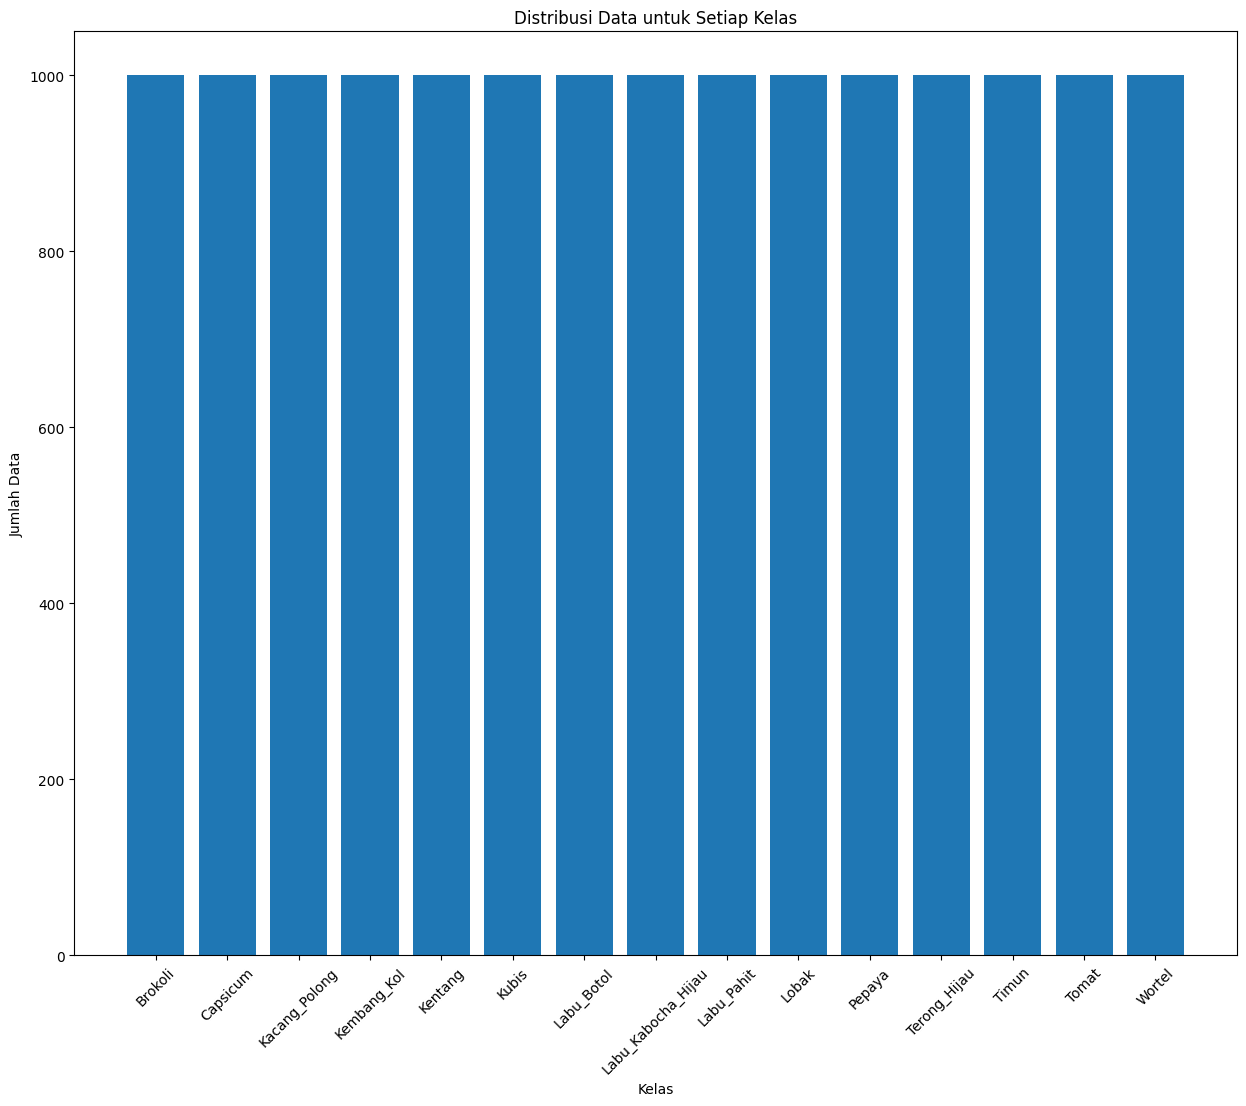

In [ ]:
# Data distribusi data pada setiap kelas
class_names = df_count_train["class"]
class_counts = df_count_train["count"]

# Membuat plot bar untuk distribusi data pada setiap kelas
plt.figure(figsize=(15, 12))
plt.bar(class_names, class_counts)
plt.xlabel("Kelas")
plt.ylabel("Jumlah Data")
plt.title("Distribusi Data untuk Setiap Kelas")
plt.xticks(rotation=45)  # Memutar label sumbu x untuk kelas yang panjang
plt.show()

In [ ]:
# Visualize the class distribution
fig = px.pie(names=class_names, values=class_dis, title="Distribusi Data untuk Setiap Kelas", hole=0.4)
fig.update_layout(title_x=0.5)  # Mengatur posisi judul
fig.update_layout({'title':{'x':0.5}})
fig.show()

# **Menampilkan Datasets Pelatihan Pada Setiap *Class* Secara Acak**

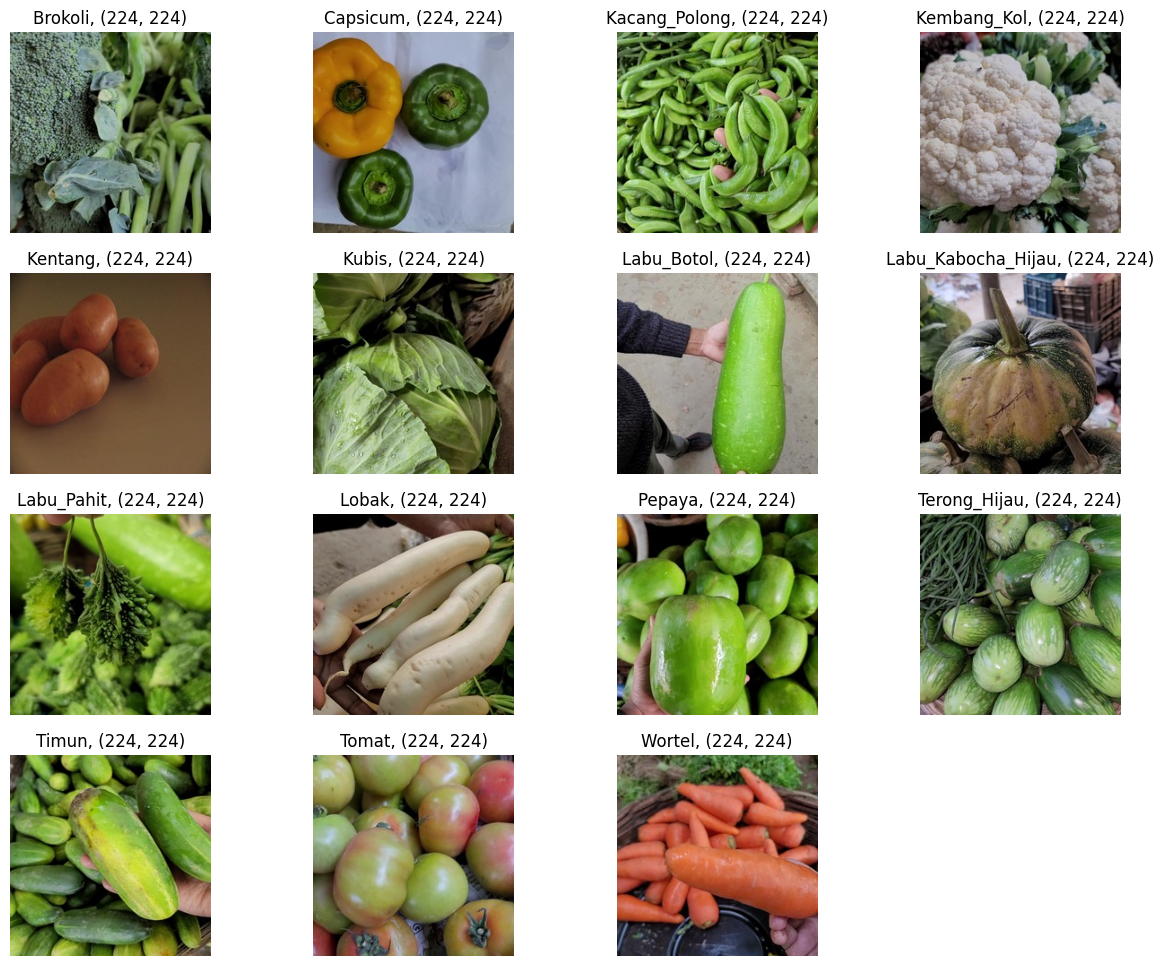

In [ ]:
## Viz Random Sample from each class
plt.figure(figsize=(15, 12))
# iterate over dictionary items (class label, image array)
for i, (cls,img) in enumerate(image_dict.items()):
    # create a subplot axis
    ax = plt.subplot(4, 4, i + 1)
    # plot each image
    plt.imshow(img)
    # set "class name" along with "image size" as title
    plt.title(f'{cls}, {img.size}')
    plt.axis("off")

# Data Preparation

In [ ]:
print('\nLoading Train Data...')
train_data = tf.keras.utils.image_dataset_from_directory(
    "Datasets/train", shuffle = True,
)

print('\nLoading Validasi Data...')
val_data = tf.keras.utils.image_dataset_from_directory(
    "Datasets/validation", shuffle = False,
)

print('\nLoading Testing Data...')
test_data = tf.keras.utils.image_dataset_from_directory(
    "Datasets/test", shuffle = False,
)



Loading Train Data...
Found 15000 files belonging to 15 classes.

Loading Validasi Data...
Found 3000 files belonging to 15 classes.

Loading Testing Data...
Found 3000 files belonging to 15 classes.


In [ ]:
def create_data_preprocess_model(shear_range=0.2, zoom_range=0.2, horizontal_flip=True):
    data_preprocess = keras.Sequential(
        name="data_preprocess",
        layers=[
            layers.Rescaling(1.0 / 255),
        ]
    )

    return data_preprocess


train_data_gen = create_data_preprocess_model(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)



data_preprocess_val_test = keras.Sequential(
    name="data_preprocess_val_test",
    layers=[
        layers.Rescaling(1.0/255), 
    ]
)


train_ds = train_data.map(lambda x, y: (train_data_gen(x), y))
val_ds = val_data.map(lambda x, y: (data_preprocess_val_test(x), y))
test_ds = test_data.map(lambda x, y: (data_preprocess_val_test(x), y))

# Modelling
## Menggunakan model MobileNet

In [ ]:
def training_plot(metrics, history):
  f, ax = plt.subplots(1, len(metrics), figsize=(5*len(metrics), 5))
  for idx, metric in enumerate(metrics):
    ax[idx].plot(history.history[metric], ls='dashed')
    ax[idx].set_xlabel("Epochs")
    ax[idx].set_ylabel(metric)
    ax[idx].plot(history.history['val_' + metric]);
    ax[idx].legend([metric, 'val_' + metric])

def ConfusionMatrix(model, ds, label_list):
# Note: This logic doesn't work with shuffled datasets
    plt.figure(figsize=(15,15))
    y_pred = model.predict(ds)
    predicted_categories = tf.argmax(y_pred, axis=1)
    true_categories = tf.concat([y for x, y in ds], axis=0)
    cm = metrics.confusion_matrix(true_categories,predicted_categories) # last batch
    sns.heatmap(cm, annot=True, xticklabels=label_list, yticklabels=label_list, cmap="YlGnBu", fmt='g')
    plt.show()

def testAccuracy(model):
    true_categories = tf.concat([y for x, y in test_ds], axis=0)
    images = tf.concat([x for x, y in test_ds], axis=0)
    y_pred = model.predict(test_ds)
    class_names = test_data.class_names
    predicted_categories = tf.argmax(y_pred, axis=1)
    test_acc = metrics.accuracy_score(true_categories, predicted_categories) * 100
    print(f'\nTest Accuracy: {test_acc:.2f}%\n')

def plot_image(pred_array, true_label, img, class_names):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(pred_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ".format(class_names[predicted_label],
                                100*np.max(pred_array),
                                ),
                                color=color)

def predictions(model):
    true_categories = tf.concat([y for x, y in test_ds], axis=0)
    images = tf.concat([x for x, y in test_ds], axis=0)
    y_pred = model.predict(test_ds)
    class_names = test_data.class_names
    # Randomly sample 15 test images and plot it with their predicted labels, and the true labels.
    indices = random.sample(range(len(images)), 15)
    # Color correct predictions in blue and incorrect predictions in red.
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    plt.figure(figsize=(4*num_cols, 2*num_rows))
    for i,index in enumerate(indices):
      plt.subplot(num_rows, num_cols, i+1)
      plot_image(y_pred[index], true_categories[index], images[index],class_names)
    plt.tight_layout()
    plt.show()

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint("final_model.h5", save_best_only=True)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",patience=5, restore_best_weights=True
)

In [ ]:
pretrained_mobilenet_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False)
pretrained_mobilenet_model.trainable=False
mobilenet_model = tf.keras.Sequential([
    pretrained_mobilenet_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(15, activation='softmax')
])

9406464/9406464 [==============================] - 4s 0us/step


## Compile model

In [ ]:
mobilenet_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
mobilenet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, None, None, 1280   2257984   
 tional)                     )                                   
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dense_1 (Dense)             (None, 15)                1935      
                                                                 
Total params: 2423887 (9.25 MB)
Trainable params: 165903 (648.06 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


## Melatih model

In [ ]:
history_mobilenet = mobilenet_model.fit(train_ds, epochs=10, validation_data=val_ds, callbacks=[checkpoint_callback,early_stopping_callback])

Epoch 1/10
469/469 [==============================] - ETA: 0s - loss: 0.1146 - accuracy: 0.9711

c:\python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



469/469 [==============================] - 797s 2s/step - loss: 0.1146 - accuracy: 0.9711 - val_loss: 0.0305 - val_accuracy: 0.9903
Epoch 2/10
469/469 [==============================] - 734s 2s/step - loss: 0.0087 - accuracy: 0.9981 - val_loss: 0.0139 - val_accuracy: 0.9963
Epoch 3/10
469/469 [==============================] - 818s 2s/step - loss: 0.0018 - accuracy: 0.9999 - val_loss: 0.0075 - val_accuracy: 0.9980
Epoch 4/10
469/469 [==============================] - 586s 1s/step - loss: 6.7814e-04 - accuracy: 1.0000 - val_loss: 0.0071 - val_accuracy: 0.9980
Epoch 5/10
469/469 [==============================] - 573s 1s/step - loss: 4.1041e-04 - accuracy: 1.0000 - val_loss: 0.0074 - val_accuracy: 0.9977
Epoch 6/10
469/469 [==============================] - 518s 1s/step - loss: 2.7317e-04 - accuracy: 1.0000 - val_loss: 0.0069 - val_accuracy: 0.9980
Epoch 7/10
469/469 [==============================] - 506s 1s/step - loss: 1.9526e-04 - accuracy: 1.0000 - val_loss: 0.0067 - val_accuracy: 0

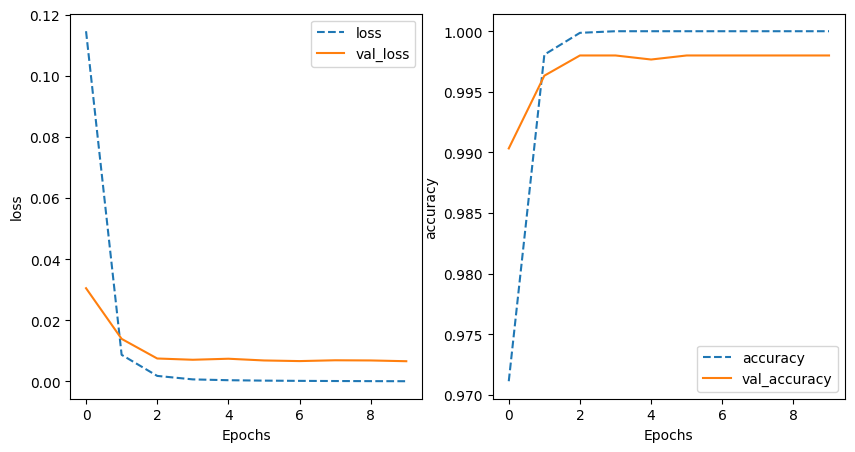

In [ ]:
training_plot(['loss', 'accuracy'], history_mobilenet)

In [ ]:
testAccuracy(mobilenet_model)

94/94 [==============================] - 93s 965ms/step

Test Accuracy: 99.83%



94/94 [==============================] - 129s 1s/step


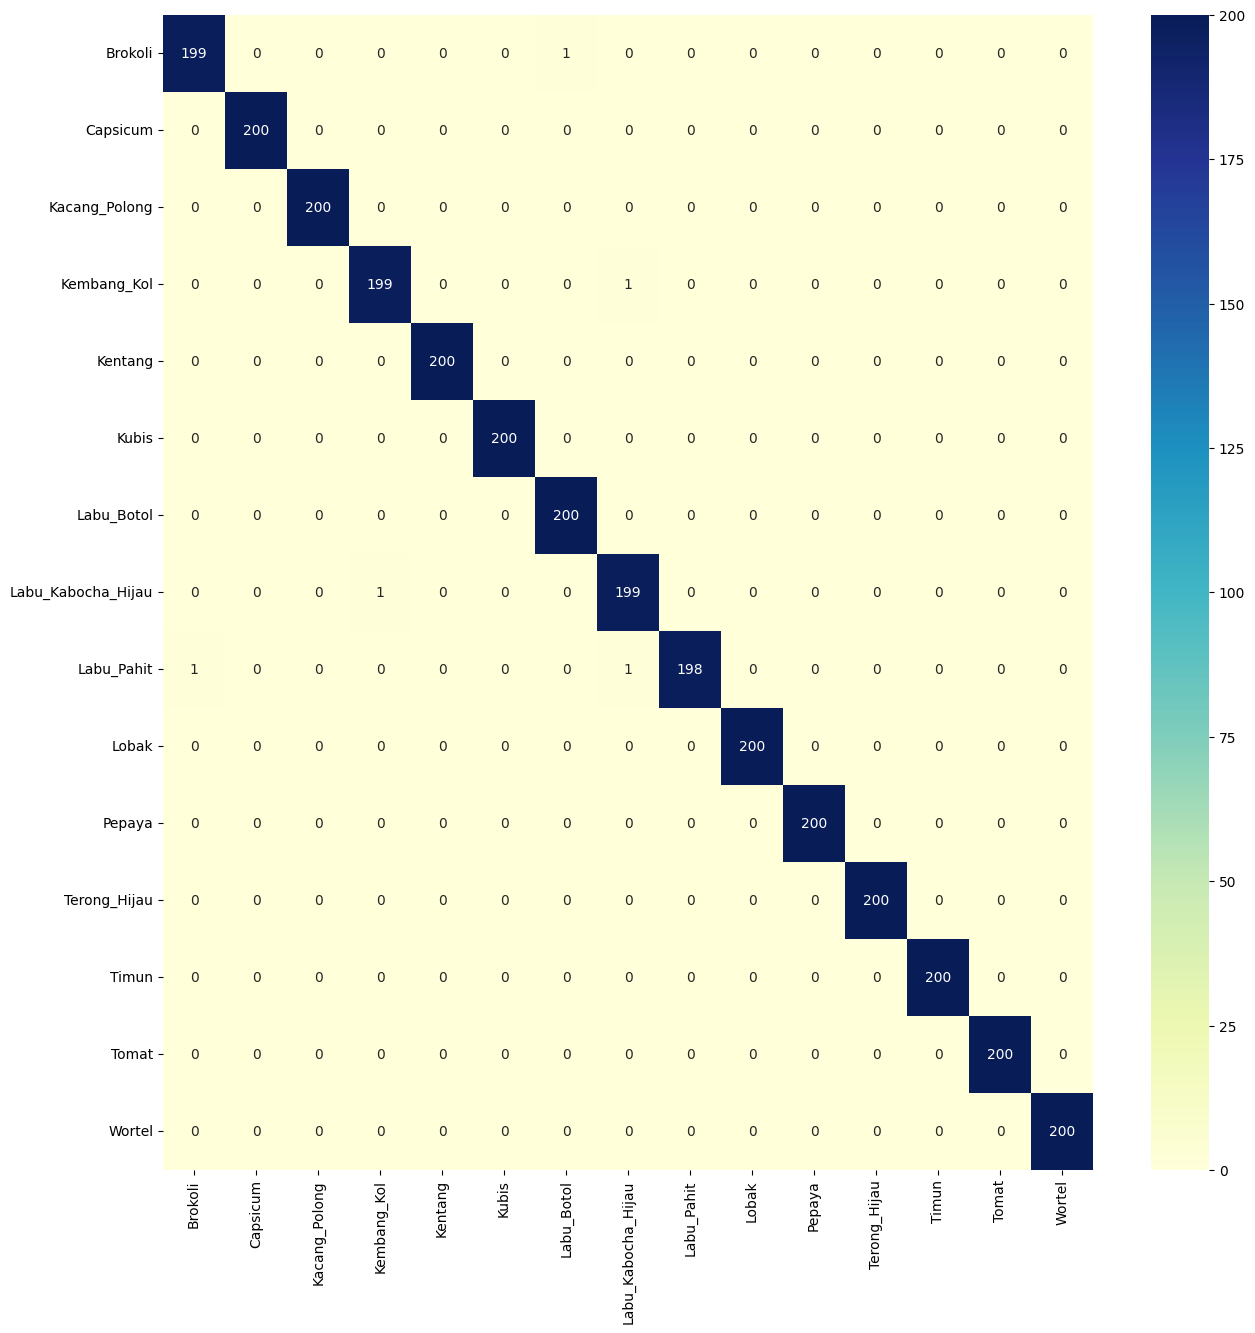

In [ ]:
ConfusionMatrix(mobilenet_model, test_ds, test_data.class_names)

# Evaluasi model

In [ ]:
test_loss, test_acc = mobilenet_model.evaluate(val_ds)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

94/94 [==============================] - 86s 909ms/step - loss: 0.0066 - accuracy: 0.9980
Test Loss: 0.0066213104873895645
Test Accuracy: 0.9980000257492065


## Evaluasi Model Dengan Datasets test

In [ ]:
mobilenet_model.evaluate(test_ds)

94/94 [==============================] - 95s 1s/step - loss: 0.0048 - accuracy: 0.9983


[0.00484613748267293, 0.9983333349227905]

94/94 [==============================] - 100s 1s/step


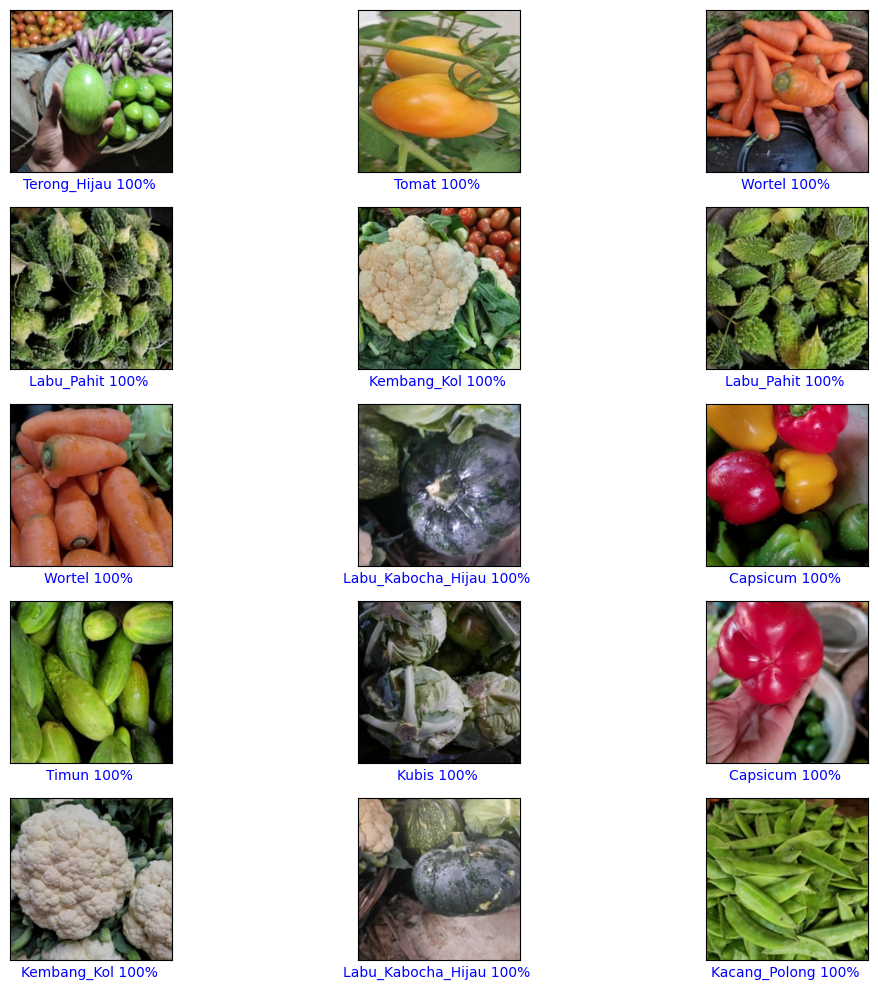

In [ ]:
predictions(mobilenet_model)

1/1 [==============================] - 0s 82ms/step


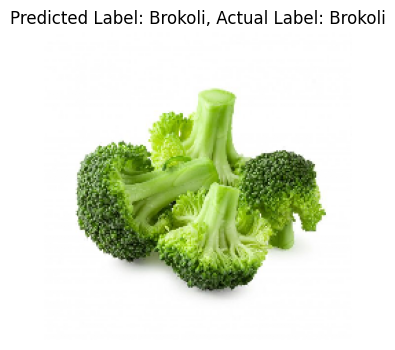

In [ ]:
# Testing the Model

test_image_path = 'Datasets/test_other_image/Brokoli/002.jpeg'

def generate_predictions(test_image_path, actual_label):

    # 1. Load and preprocess the image
    test_img = image.load_img(test_image_path, target_size=(224, 224))
    test_img_arr = image.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

    # 2. Make Predictions
    predicted_label = np.argmax(mobilenet_model.predict(test_img_input))
    predicted_vegetable = class_names[predicted_label]
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_vegetable, actual_label))
    plt.grid()
    plt.axis('off')
    plt.show()

# call the function
generate_predictions(test_image_path, actual_label='Brokoli')